In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [8]:
winedf = pd.read_csv('wine.csv')

In [9]:
winedf.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [10]:
X = winedf.drop('quality', axis=1)
y = winedf['quality']

In [11]:
scaler =StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

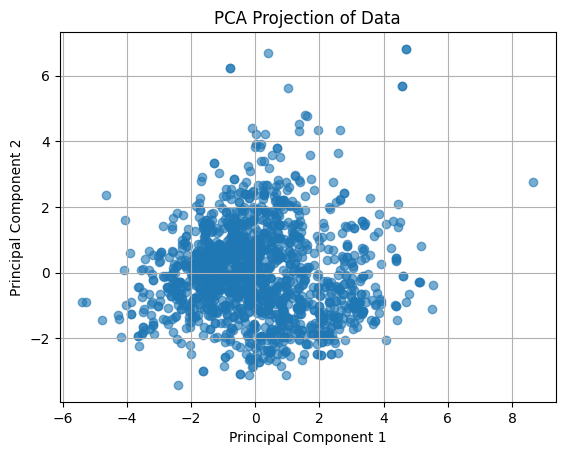

In [15]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6)
plt.title("PCA Projection of Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid()
plt.show()

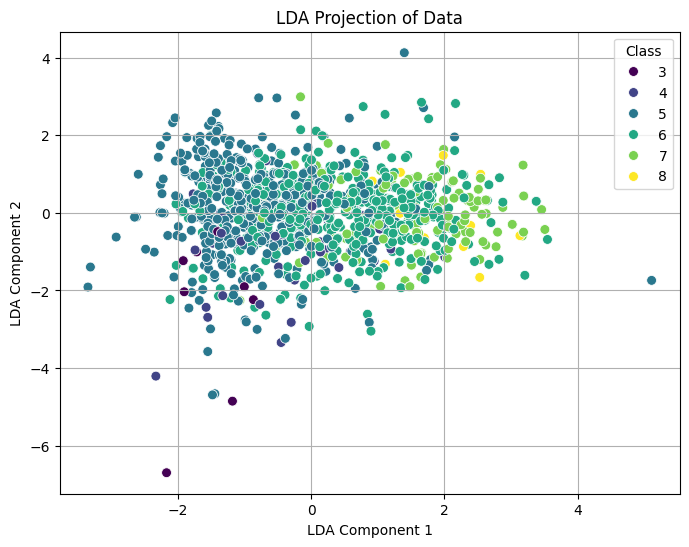

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_train, y_train)

# Plot LDA results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_lda[:, 0], y=X_lda[:, 1], hue=y_train, palette='viridis', s=50)
plt.title("LDA Projection of Data")
plt.xlabel("LDA Component 1")
plt.ylabel("LDA Component 2")
plt.legend(title='Class')
plt.grid()
plt.show()